In [29]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import re

In [30]:
#  Re-read your dataset without using the first row as header
current_cost_net_stock_private_fixed_assets_industry_manufacturing = pd.read_csv(
    '/Users/tanishagauns/Desktop/Project paper/New Data/current_cost_net_stock_private_fixed_assets_industry_manufacturing_1990 - Sheet1.csv',
    header=None
)

# Dynamically assign column names: Industry + 1975–1989
current_cost_net_stock_private_fixed_assets_industry_manufacturing.columns = ['Industry'] + list(range(1975, 1991))

# Display the clean dataset
current_cost_net_stock_private_fixed_assets_industry_manufacturing.head(14)

,Industry,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,Durable goods,247.7,269.4,299.6,338.7,392.3,453.7,506.7,538.9,554.2,583.8,621.7,656.4,688.8,717.2,749.6,784.2
1,Wood products,9.5,10.4,11.7,13.4,15.6,17.8,19.0,19.4,19.3,19.7,20.3,21.0,21.6,22.2,22.8,23.5
2,Nonmetallic mineral products,19.2,20.7,22.8,25.7,29.3,33.5,36.2,37.3,37.4,38.6,40.8,42.8,44.7,46.1,47.9,49.8
3,Primary metals,55.5,60.0,66.1,72.5,81.4,91.4,98.6,101.7,102.1,103.2,105.5,106.7,108.5,111.0,114.1,117.8
4,Fabricated metal products,27.0,29.7,33.6,38.5,44.9,52.1,58.1,61.5,62.4,65.0,68.8,72.7,76.2,79.1,82.3,86.3
5,Machinery,26.5,29.2,32.9,37.9,44.8,52.8,60.3,65.7,68.6,72.9,77.9,81.5,84.9,88.3,92.4,97.1
6,Computer and electronic products,36.7,40.0,44.5,50.7,59.6,70.7,81.0,89.2,95.1,104.4,113.9,122.0,130.1,138.5,147.3,156.3
7,"Electrical equipment, appliances, and components",14.6,15.8,17.1,19.0,21.7,25.1,28.0,30.1,31.5,33.6,35.5,37.3,38.2,39.5,41.1,42.9
8,"Motor vehicles, bodies and trailers, and parts",25.6,27.4,31.0,35.9,42.0,48.6,55.7,57.2,55.8,57.3,61.5,66.6,70.6,71.9,75.0,78.8
9,Other transportation equipment,18.6,20.1,21.9,24.7,29.1,34.3,39.0,43.5,47.1,52.2,57.9,63.9,69.2,73.4,76.7,79.3


In [31]:
current_cost_net_stock_private_fixed_assets_industry_manufacturing.columns = ['Industry',] + [str(i) + '_net_stock' for i in range(1975, 1991)]
current_cost_net_stock_private_fixed_assets_industry_manufacturing.columns

Index(['Industry', '1975_net_stock', '1976_net_stock', '1977_net_stock',
       '1978_net_stock', '1979_net_stock', '1980_net_stock', '1981_net_stock',
       '1982_net_stock', '1983_net_stock', '1984_net_stock', '1985_net_stock',
       '1986_net_stock', '1987_net_stock', '1988_net_stock', '1989_net_stock',
       '1990_net_stock'],
      dtype='object')

In [32]:
# Re-read your dataset without using the first row as header
current_cost_net_stock_private_fixed_assets_industry_healthcare = pd.read_csv(
     '/Users/tanishagauns/Desktop/Project paper/New Data/current_cost_net_stock_private_fixed_assets_industry_healthcareet_1990 - Sheet1.csv',
    header=None
)

# Dynamically assign column names: Industry + 1975–1990
current_cost_net_stock_private_fixed_assets_industry_healthcare.columns = ['Industry'] + list(range(1975, 1991))

# Display the clean dataset
current_cost_net_stock_private_fixed_assets_industry_healthcare.head(14)

,Industry,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,Ambulatory health care services,26.3,28.5,31.8,35.8,41.1,47.1,53.2,59.6,66.1,73.4,80.0,88.2,96.5,105.6,114.9,124.4
1,Hospitals,63.3,70.3,79.4,90.3,104.0,118.5,131.1,142.7,153.5,165.6,175.4,187.8,200.9,215.3,230.8,246.4
2,Nursing and residential care facilities,3.7,4.0,4.5,5.0,5.8,6.6,7.3,8.0,8.7,9.6,10.4,11.3,12.3,13.4,14.6,15.8
3,Social assistance,3.8,4.1,4.6,5.2,5.9,6.7,7.4,7.9,8.3,8.9,9.5,10.2,11.0,11.8,12.7,13.4


In [33]:
current_cost_net_stock_private_fixed_assets_industry_healthcare.columns = ['Industry',] + [str(i) + '_net_stock' for i in range(1975, 1991)]
current_cost_net_stock_private_fixed_assets_industry_healthcare.columns

Index(['Industry', '1975_net_stock', '1976_net_stock', '1977_net_stock',
       '1978_net_stock', '1979_net_stock', '1980_net_stock', '1981_net_stock',
       '1982_net_stock', '1983_net_stock', '1984_net_stock', '1985_net_stock',
       '1986_net_stock', '1987_net_stock', '1988_net_stock', '1989_net_stock',
       '1990_net_stock'],
      dtype='object')

In [34]:
#  Re-read your dataset without using the first row as header
investment_private_equipment_industry_manufacturing = pd.read_csv(
    '/Users/tanishagauns/Desktop/Project paper/New Data/investment_private_equipment_industry_manufacturing_1990 - Sheet1.csv',
    header=None
)

# Dynamically assign column names: Industry + 1975–1991
investment_private_equipment_industry_manufacturing.columns = ['Industry'] + list(range(1975, 1991))

# Display the clean dataset
investment_private_equipment_industry_manufacturing.head(14)

,Industry,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,Durable goods,15.8,17.1,20.8,25.1,28.9,33.0,39.0,31.6,28.5,37.5,41.1,37.3,37.6,36.0,42.3,44.0
1,Wood products,0.9,0.9,1.2,1.4,1.7,1.6,1.4,1.1,1.0,1.3,1.4,1.4,1.5,1.4,1.7,1.6
2,Nonmetallic mineral products,1.4,1.4,1.7,2.3,2.4,2.9,2.7,2.0,1.7,2.4,2.8,2.5,2.6,2.2,2.9,2.7
3,Primary metals,3.3,3.4,3.7,3.9,4.3,4.6,5.4,3.9,3.9,4.0,4.4,3.0,3.6,4.2,4.8,5.0
4,Fabricated metal products,2.0,2.1,2.6,3.0,3.4,3.9,4.6,3.7,3.0,4.0,4.4,4.4,4.5,4.2,4.7,4.9
5,Machinery,1.7,1.8,2.3,3.0,3.6,4.0,4.8,4.4,3.9,4.8,5.0,4.2,4.3,4.3,4.8,5.1
6,Computer and electronic products,2.3,2.6,3.1,3.8,4.5,5.4,6.3,6.3,6.4,8.6,8.9,7.8,7.8,8.4,9.7,10.1
7,"Electrical equipment, appliances, and components",0.7,0.8,0.9,1.1,1.4,1.8,1.8,1.9,2.1,2.9,3.0,2.1,2.1,2.3,2.6,2.7
8,"Motor vehicles, bodies and trailers, and parts",1.8,2.0,2.9,3.7,4.0,4.5,7.3,3.6,2.3,4.1,5.3,5.3,5.3,3.2,4.9,5.6
9,Other transportation equipment,0.7,0.9,0.9,1.2,1.7,2.2,2.4,2.4,2.2,2.9,3.2,3.1,3.1,3.0,2.9,3.2


In [35]:
investment_private_equipment_industry_manufacturing.columns = ['Industry',] + [str(i) + '_equipment' for i in range(1975, 1991)]
investment_private_equipment_industry_manufacturing.columns

Index(['Industry', '1975_equipment', '1976_equipment', '1977_equipment',
       '1978_equipment', '1979_equipment', '1980_equipment', '1981_equipment',
       '1982_equipment', '1983_equipment', '1984_equipment', '1985_equipment',
       '1986_equipment', '1987_equipment', '1988_equipment', '1989_equipment',
       '1990_equipment'],
      dtype='object')

In [36]:
# Re-read your dataset without using the first row as header
investment_private_equipment_industry_healthcare = pd.read_csv(
    '/Users/tanishagauns/Desktop/Project paper/New Data/investment_private_equipment_industry_healthcare_1990 - Sheet1.csv',
    header=None
)

# Dynamically assign column names: Industry + 1975–1990
investment_private_equipment_industry_healthcare.columns = ['Industry'] + list(range(1975, 1991))

# Display the clean dataset
investment_private_equipment_industry_healthcare.head(14)


,Industry,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,Ambulatory health care services,1.8,2.1,2.5,3.0,3.2,3.6,4.4,5.4,6.4,7.0,6.9,7.6,8.5,9.7,10.6,11.5
1,Hospitals,2.5,3.0,3.1,3.6,3.8,4.1,4.7,5.5,6.2,6.9,7.0,7.6,8.5,9.5,10.6,11.6
2,Nursing and residential care facilities,0.1,0.1,0.2,0.2,0.2,0.3,0.3,0.4,0.5,0.5,0.5,0.5,0.5,0.7,0.8,0.9
3,Social assistance,0.1,0.2,0.2,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.3,0.4,0.4,0.4,0.5,0.5


In [37]:
investment_private_equipment_industry_healthcare.columns = ['Industry',] + [str(i) + '_equipment' for i in range(1975, 1991)]
investment_private_equipment_industry_healthcare.columns

Index(['Industry', '1975_equipment', '1976_equipment', '1977_equipment',
       '1978_equipment', '1979_equipment', '1980_equipment', '1981_equipment',
       '1982_equipment', '1983_equipment', '1984_equipment', '1985_equipment',
       '1986_equipment', '1987_equipment', '1988_equipment', '1989_equipment',
       '1990_equipment'],
      dtype='object')

In [38]:
# Re-read your dataset without using the first row as header
investment_private_fixed_assets_industry_manufacturing = pd.read_csv(
    '/Users/tanishagauns/Desktop/Project paper/New Data/investment_private_fixed_assets_industry_manufacturing_1990 - Sheet1.csv',
    header=None
)

# Dynamically assign column names: Industry + 1975–1990 (adjust based on column count)
investment_private_fixed_assets_industry_manufacturing.columns = ['Industry'] + list(range(1975, 1991))

# Display the clean dataset
investment_private_fixed_assets_industry_manufacturing.head(14)

,Industry,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,Durable goods,32.9,35.3,40.9,49.3,56.6,65.4,75.6,69.3,66.8,82.2,91.6,88.4,88.8,89.2,99.9,103.6
1,Wood products,1.2,1.2,1.6,1.9,2.2,2.2,2.0,1.5,1.4,1.8,1.8,1.8,1.9,1.8,2.1,2.0
2,Nonmetallic mineral products,2.1,2.1,2.5,3.3,3.4,4.1,3.9,3.0,2.8,3.8,4.6,4.2,4.3,4.0,4.8,4.8
3,Primary metals,4.9,4.8,5.1,5.4,5.9,6.3,7.6,5.7,5.6,5.6,6.4,4.6,5.2,5.9,6.9,7.4
4,Fabricated metal products,3.1,3.2,3.7,4.5,4.9,5.7,6.7,5.6,4.8,6.2,6.9,6.7,6.7,6.5,7.4,7.8
5,Machinery,3.8,3.9,4.7,5.9,6.9,7.9,9.4,9.1,8.2,9.9,10.5,9.0,8.9,9.3,10.7,11.4
6,Computer and electronic products,7.0,7.7,8.7,10.5,12.5,15.1,17.1,17.9,18.4,22.7,24.4,23.3,24.1,25.8,27.9,29.3
7,"Electrical equipment, appliances, and components",2.0,2.2,2.3,2.7,3.2,3.8,4.3,4.2,4.4,5.2,5.2,5.0,4.0,4.5,5.0,5.3
8,"Motor vehicles, bodies and trailers, and parts",4.4,5.1,6.8,8.2,9.1,10.3,13.3,9.5,8.2,11.0,13.6,15.0,14.5,12.5,15.5,16.3
9,Other transportation equipment,2.5,2.9,3.1,4.0,5.1,6.2,7.0,8.2,8.7,10.9,12.5,13.5,13.3,12.9,13.0,12.5


In [39]:
investment_private_fixed_assets_industry_manufacturing.columns = ['Industry',] + [str(i) + '_fixed_assets' for i in range(1975, 1991)]
investment_private_fixed_assets_industry_manufacturing.columns

Index(['Industry', '1975_fixed_assets', '1976_fixed_assets',
       '1977_fixed_assets', '1978_fixed_assets', '1979_fixed_assets',
       '1980_fixed_assets', '1981_fixed_assets', '1982_fixed_assets',
       '1983_fixed_assets', '1984_fixed_assets', '1985_fixed_assets',
       '1986_fixed_assets', '1987_fixed_assets', '1988_fixed_assets',
       '1989_fixed_assets', '1990_fixed_assets'],
      dtype='object')

In [40]:
# Re-read your dataset without using the first row as header
investment_private_fixed_assets_industry_healthcare = pd.read_csv(
    '/Users/tanishagauns/Desktop/Project paper/New Data/investment_private_fixed_assets_industry_healthcare _1990 - Sheet1.csv',
    header=None
)

# Dynamically assign column names: Industry + 1975–1990 (adjust based on column count)
investment_private_fixed_assets_industry_healthcare.columns = ['Industry'] + list(range(1975, 1991))

# Display the clean dataset
investment_private_fixed_assets_industry_healthcare.head(14)

,Industry,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,Ambulatory health care services,2.4,2.7,3.1,3.8,4.3,5.1,6.6,8.6,9.9,11.3,12.1,13.2,14.8,15.9,16.9,11.5
1,Hospitals,5.9,6.6,6.9,7.3,7.8,8.5,9.7,12.3,13.6,13.9,14.5,16.2,18.4,20.3,22.4,11.6
2,Nursing and residential care facilities,0.2,0.3,0.3,0.4,0.4,0.5,0.6,0.8,0.9,1.1,1.2,1.3,1.5,1.6,1.7,0.9
3,Social assistance,0.3,0.3,0.4,0.4,0.5,0.5,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.1,1.1,0.5


In [41]:
investment_private_fixed_assets_industry_healthcare.columns = ['Industry',] + [str(i) + '_fixed_assets' for i in range(1975, 1991)]
investment_private_fixed_assets_industry_healthcare.columns

Index(['Industry', '1975_fixed_assets', '1976_fixed_assets',
       '1977_fixed_assets', '1978_fixed_assets', '1979_fixed_assets',
       '1980_fixed_assets', '1981_fixed_assets', '1982_fixed_assets',
       '1983_fixed_assets', '1984_fixed_assets', '1985_fixed_assets',
       '1986_fixed_assets', '1987_fixed_assets', '1988_fixed_assets',
       '1989_fixed_assets', '1990_fixed_assets'],
      dtype='object')

In [42]:
def add_year_suffix(df, suffix):
    df = df.copy()

    # Ensure an Industry column exists (first col is index, second is industry in your files)
    if 'Industry' not in df.columns and len(df.columns) >= 2:
        df.rename(columns={df.columns[1]: 'Industry'}, inplace=True)
        # drop first index-like column if it's not Industry
        if df.columns[0] != 'Industry':
            df.drop(columns=[df.columns[0]], inplace=True)

    # If all non-Industry columns already end with this suffix, do nothing
    other = [c for c in df.columns if c != 'Industry']
    if other and all(str(c).endswith(suffix) for c in other):
        return df

    # Rename any column that starts with a 4-digit year to "<year><suffix>"
    rename_map = {}
    for c in df.columns:
        if c == 'Industry':
            continue
        s = str(c).strip()
        m = re.match(r'^(\d{4})', s)  # grab leading year if present
        if m:
            y = m.group(1)
            target = f"{y}{suffix}"
            if s != target:
                rename_map[c] = target

    df = df.rename(columns=rename_map)

    # Keep only Industry + properly suffixed year columns
    keep = ['Industry'] + [col for col in df.columns
                           if col != 'Industry' and re.match(r'^\d{4}' + re.escape(suffix) + r'$', str(col))]
    df = df[keep]
    return df


In [43]:
# Ensure 'Industry' is column 2 and drop the first index col if needed (if you already have this, keep using it)
def ensure_industry(df):
    df = df.copy()
    if 'Industry' not in df.columns and len(df.columns) >= 2:
        df.rename(columns={df.columns[1]: 'Industry'}, inplace=True)
        if df.columns[0] != 'Industry':
            df.drop(columns=[df.columns[0]], inplace=True)
    df['Industry'] = df['Industry'].astype(str).str.strip()
    return df

h_net   = ensure_industry(current_cost_net_stock_private_fixed_assets_industry_healthcare)
h_equip = ensure_industry(investment_private_equipment_industry_healthcare)
h_fix   = ensure_industry(investment_private_fixed_assets_industry_healthcare)

h_net_s   = add_year_suffix(h_net,   '_net_stock')
h_equip_s = add_year_suffix(h_equip, '_equipment')
h_fix_s   = add_year_suffix(h_fix,   '_fixed_assets')

# Merge by Industry (use how='outer' first to diagnose mismatches if needed)
combined_df_healthcare = (
    h_net_s
      .merge(h_equip_s, on='Industry', how='inner')
      .merge(h_fix_s,   on='Industry', how='inner')
)

combined_df_healthcare.head(12)


,Industry,1975_net_stock,1976_net_stock,1977_net_stock,1978_net_stock,1979_net_stock,1980_net_stock,1981_net_stock,1982_net_stock,1983_net_stock,...,1981_fixed_assets,1982_fixed_assets,1983_fixed_assets,1984_fixed_assets,1985_fixed_assets,1986_fixed_assets,1987_fixed_assets,1988_fixed_assets,1989_fixed_assets,1990_fixed_assets
0,Ambulatory health care services,26.3,28.5,31.8,35.8,41.1,47.1,53.2,59.6,66.1,...,6.6,8.6,9.9,11.3,12.1,13.2,14.8,15.9,16.9,11.5
1,Hospitals,63.3,70.3,79.4,90.3,104.0,118.5,131.1,142.7,153.5,...,9.7,12.3,13.6,13.9,14.5,16.2,18.4,20.3,22.4,11.6
2,Nursing and residential care facilities,3.7,4.0,4.5,5.0,5.8,6.6,7.3,8.0,8.7,...,0.6,0.8,0.9,1.1,1.2,1.3,1.5,1.6,1.7,0.9
3,Social assistance,3.8,4.1,4.6,5.2,5.9,6.7,7.4,7.9,8.3,...,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.1,1.1,0.5


In [44]:
# Ensure 'Industry' is column 2 and drop the first index col if needed (if you already have this, keep using it)
def ensure_industry(df):
    df = df.copy()
    if 'Industry' not in df.columns and len(df.columns) >= 2:
        df.rename(columns={df.columns[1]: 'Industry'}, inplace=True)
        if df.columns[0] != 'Industry':
            df.drop(columns=[df.columns[0]], inplace=True)
    df['Industry'] = df['Industry'].astype(str).str.strip()
    return df

h_net   = ensure_industry(current_cost_net_stock_private_fixed_assets_industry_manufacturing)
h_equip = ensure_industry(investment_private_equipment_industry_manufacturing)
h_fix   = ensure_industry(investment_private_fixed_assets_industry_manufacturing)

h_net_s   = add_year_suffix(h_net,   '_net_stock')
h_equip_s = add_year_suffix(h_equip, '_equipment')
h_fix_s   = add_year_suffix(h_fix,   '_fixed_assets')

# Merge by Industry (use how='outer' first to diagnose mismatches if needed)
combined_df_manufacturing = (
    h_net_s
      .merge(h_equip_s, on='Industry', how='inner')
      .merge(h_fix_s,   on='Industry', how='inner')
)

combined_df_manufacturing.head(12)


,Industry,1975_net_stock,1976_net_stock,1977_net_stock,1978_net_stock,1979_net_stock,1980_net_stock,1981_net_stock,1982_net_stock,1983_net_stock,...,1981_fixed_assets,1982_fixed_assets,1983_fixed_assets,1984_fixed_assets,1985_fixed_assets,1986_fixed_assets,1987_fixed_assets,1988_fixed_assets,1989_fixed_assets,1990_fixed_assets
0,Durable goods,247.7,269.4,299.6,338.7,392.3,453.7,506.7,538.9,554.2,...,75.6,69.3,66.8,82.2,91.6,88.4,88.8,89.2,99.9,103.6
1,Wood products,9.5,10.4,11.7,13.4,15.6,17.8,19.0,19.4,19.3,...,2.0,1.5,1.4,1.8,1.8,1.8,1.9,1.8,2.1,2.0
2,Nonmetallic mineral products,19.2,20.7,22.8,25.7,29.3,33.5,36.2,37.3,37.4,...,3.9,3.0,2.8,3.8,4.6,4.2,4.3,4.0,4.8,4.8
3,Primary metals,55.5,60.0,66.1,72.5,81.4,91.4,98.6,101.7,102.1,...,7.6,5.7,5.6,5.6,6.4,4.6,5.2,5.9,6.9,7.4
4,Fabricated metal products,27.0,29.7,33.6,38.5,44.9,52.1,58.1,61.5,62.4,...,6.7,5.6,4.8,6.2,6.9,6.7,6.7,6.5,7.4,7.8
5,Machinery,26.5,29.2,32.9,37.9,44.8,52.8,60.3,65.7,68.6,...,9.4,9.1,8.2,9.9,10.5,9.0,8.9,9.3,10.7,11.4
6,Computer and electronic products,36.7,40.0,44.5,50.7,59.6,70.7,81.0,89.2,95.1,...,17.1,17.9,18.4,22.7,24.4,23.3,24.1,25.8,27.9,29.3
7,"Electrical equipment, appliances, and components",14.6,15.8,17.1,19.0,21.7,25.1,28.0,30.1,31.5,...,4.3,4.2,4.4,5.2,5.2,5.0,4.0,4.5,5.0,5.3
8,"Motor vehicles, bodies and trailers, and parts",25.6,27.4,31.0,35.9,42.0,48.6,55.7,57.2,55.8,...,13.3,9.5,8.2,11.0,13.6,15.0,14.5,12.5,15.5,16.3
9,Other transportation equipment,18.6,20.1,21.9,24.7,29.1,34.3,39.0,43.5,47.1,...,7.0,8.2,8.7,10.9,12.5,13.5,13.3,12.9,13.0,12.5


In [45]:
# --- helper: melt one metric from wide to long ---
def melt_metric(df, metric_suffix, value_name):
    # columns like "1975_net_stock" or "1975_fixed_assets"
    pattern = re.compile(r"^(\d{4})_" + re.escape(metric_suffix) + r"$")
    year_cols = [c for c in df.columns if pattern.match(c)]
    long = df.melt(
        id_vars=["Industry"],
        value_vars=year_cols,
        var_name="year_metric",
        value_name=value_name
    )
    long["Year"] = long["year_metric"].str.extract(r"^(\d{4})").astype(int)
    long = long.drop(columns=["year_metric"])
    return long

# Tag groups
healthcare = combined_df_healthcare.copy()
healthcare["Group"] = "Healthcare"

manufacturing = combined_df_manufacturing.copy()
manufacturing["Group"] = "Manufacturing"

# Melt each metric for each group
def build_group_long(df):
    net  = melt_metric(df, "net_stock",     "net_stock")
    eqp  = melt_metric(df, "equipment",     "investment_equipment")
    fix  = melt_metric(df, "fixed_assets",  "investment_fixed_assets")
    out = (
        net
        .merge(eqp, on=["Industry","Year"], how="outer")
        .merge(fix, on=["Industry","Year"], how="outer")
    )
    # reattach Group
    out = out.merge(df[["Industry","Group"]].drop_duplicates(), on="Industry", how="left")
    return out

long_health = build_group_long(healthcare)
long_manuf  = build_group_long(manufacturing)

panel = pd.concat([long_health, long_manuf], ignore_index=True)

# Outcome(s): investment rates (per unit of net stock)
for col in ["investment_equipment","investment_fixed_assets"]:
    panel[col + "_rate"] = panel[col] / panel["net_stock"]

# Keep analysis window if you want (1985–1990)
panel = panel[(panel["Year"]>=1975) & (panel["Year"]<=1990)].copy()

# DiD variables
panel["treated"] = (panel["Group"]=="Manufacturing").astype(int)
panel["post"]    = (panel["Year"]>=1981).astype(int)
panel["did"]     = panel["treated"]*panel["post"]

# Quick sanity check
panel.head(100)


,Industry,net_stock,Year,investment_equipment,investment_fixed_assets,Group,investment_equipment_rate,investment_fixed_assets_rate,treated,post,did
0,Ambulatory health care services,26.3,1975,1.8,2.4,Healthcare,0.068441,0.091255,0,0,0
1,Ambulatory health care services,28.5,1976,2.1,2.7,Healthcare,0.073684,0.094737,0,0,0
2,Ambulatory health care services,31.8,1977,2.5,3.1,Healthcare,0.078616,0.097484,0,0,0
3,Ambulatory health care services,35.8,1978,3.0,3.8,Healthcare,0.083799,0.106145,0,0,0
4,Ambulatory health care services,41.1,1979,3.2,4.3,Healthcare,0.077859,0.104623,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,Durable goods,784.2,1990,44.0,103.6,Manufacturing,0.056108,0.132109,1,1,1
96,"Electrical equipment, appliances, and components",14.6,1975,0.7,2.0,Manufacturing,0.047945,0.136986,1,0,0
97,"Electrical equipment, appliances, and components",15.8,1976,0.8,2.2,Manufacturing,0.050633,0.139241,1,0,0
98,"Electrical equipment, appliances, and components",17.1,1977,0.9,2.3,Manufacturing,0.052632,0.134503,1,0,0


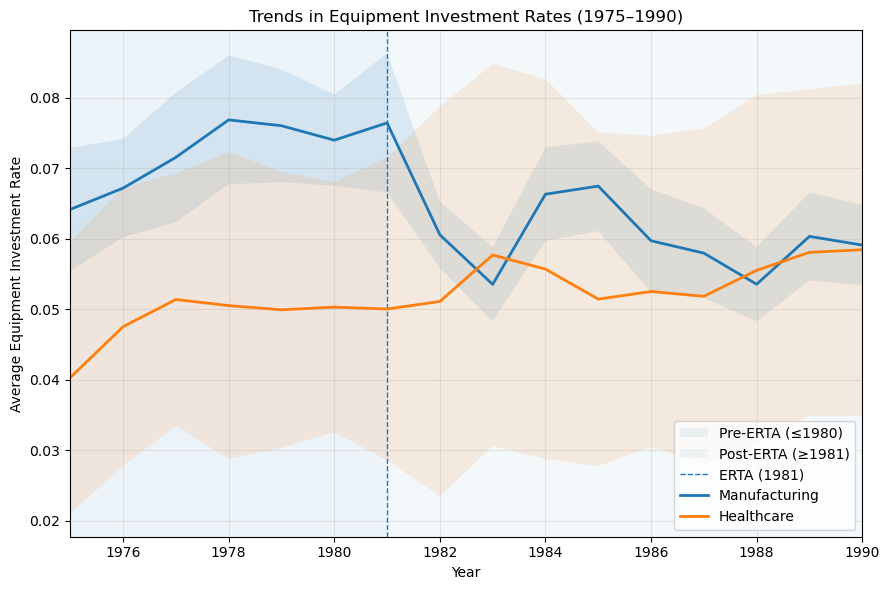

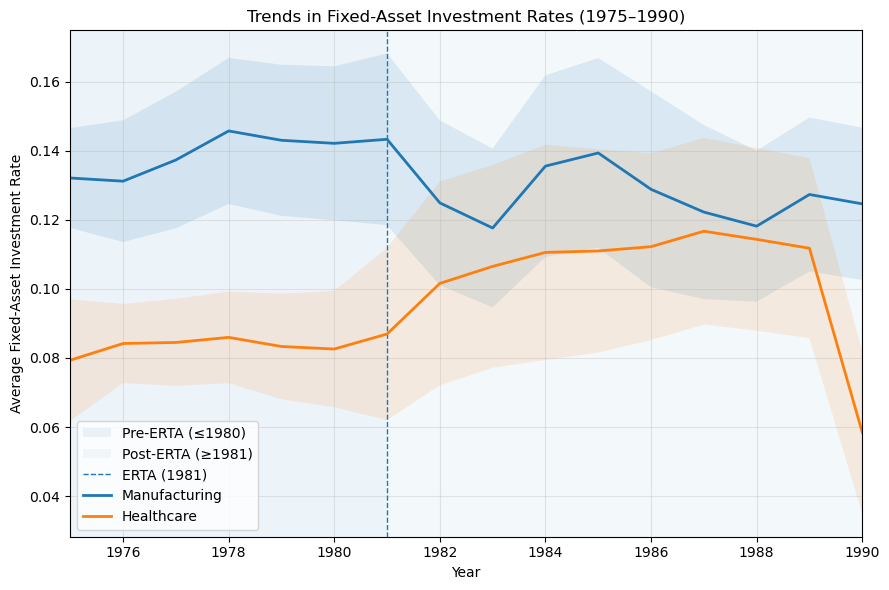

In [46]:
# --- 1) Aggregate: average (and optional CI) by Year x Group ---
def summarize_trends(panel, rate_col):
    grp = (
        panel.groupby(["Year", "Group"], as_index=False)[rate_col]
             .agg(mean="mean", count="size", std="std")
    )
    # Optional 95% CI (normal approx). Safe with count>=2; else NaN.
    grp["se"] = grp["std"] / np.sqrt(grp["count"])
    grp["ci_lo"] = grp["mean"] - 1.96*grp["se"]
    grp["ci_hi"] = grp["mean"] + 1.96*grp["se"]
    return grp

equip_trend = summarize_trends(panel, "investment_equipment_rate")
fixed_trend = summarize_trends(panel, "investment_fixed_assets_rate")

# --- 2) Plot helper with pre/post shading and ERTA line ---
def plot_trend(df, title, ylabel):
    plt.figure(figsize=(9,6))

    # Shading for pre/post
    ymin = min(df["ci_lo"].min(skipna=True), df["mean"].min())
    ymax = max(df["ci_hi"].max(skipna=True), df["mean"].max())
    plt.axvspan(1975, 1981, alpha=0.08, label="Pre-ERTA (≤1980)")
    plt.axvspan(1981, 1990, alpha=0.05, label="Post-ERTA (≥1981)")

    # ERTA vertical line
    plt.axvline(1981, linestyle="--", linewidth=1, label="ERTA (1981)")

    # Lines (and optional CI ribbons) per group
    for g in ["Manufacturing", "Healthcare"]:
        sub = df[df["Group"] == g].sort_values("Year")
        plt.plot(sub["Year"], sub["mean"], label=g, linewidth=2)
        # Confidence band if available (won't crash if NaNs)
        if sub["ci_lo"].notna().any():
            plt.fill_between(sub["Year"], sub["ci_lo"], sub["ci_hi"], alpha=0.12)

    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.xlim(1975, 1990)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- 3) Make the two figures ---
plot_trend(
    equip_trend,
    "Trends in Equipment Investment Rates (1975–1990)",
    "Average Equipment Investment Rate"
)

plot_trend(
    fixed_trend,
    "Trends in Fixed-Asset Investment Rates (1975–1990)",
    "Average Fixed-Asset Investment Rate"
)


In [59]:
# --- 1) Columns to summarize ---
cols = [
    "net_stock",
    "investment_equipment",
    "investment_fixed_assets",
    "investment_equipment_rate",
    "investment_fixed_assets_rate",
]

# --- 2) Label periods (pre/post 1981) ---
panel = panel.copy()
panel["Period"] = np.where(panel["Year"] < 1981, "Pre-ERTA (1975–1980)", "Post-ERTA (1981–1990)")

# (Optional) keep analysis window again, in case anything slipped in
panel = panel[(panel["Year"] >= 1975) & (panel["Year"] <= 1990)]

# --- 3) Separate describe() tables for each Sector x Period ---
def sector_period_describe(df, sector_label, period_label):
    g = df[(df["Group"] == sector_label) & (df["Period"] == period_label)]
    out = g[cols].describe().round(2)
    out.index.name = "Statistic"
    return out

pre_healthcare  = sector_period_describe(panel, "Healthcare",    "Pre-ERTA (1975–1980)")
pre_manu        = sector_period_describe(panel, "Manufacturing", "Pre-ERTA (1975–1980)")
post_healthcare = sector_period_describe(panel, "Healthcare",    "Post-ERTA (1981–1990)")
post_manu       = sector_period_describe(panel, "Manufacturing", "Post-ERTA (1981–1990)")

print("=== Healthcare — Pre-ERTA (1975–1980) ===")
print(pre_healthcare)
print("\n=== Manufacturing — Pre-ERTA (1975–1980) ===")
print(pre_manu)
print("\n=== Healthcare — Post-ERTA (1981–1990) ===")
print(post_healthcare)
print("\n=== Manufacturing — Post-ERTA (1981–1990) ===")
print(post_manu)

# --- 4) One compact table: Period × Group with multiple stats (nice for CSV/TeX) ---
compact = (
    panel.groupby(["Period", "Group"])[cols]
         .agg(["count", "mean", "std", "min", "median", "max"])
         .round(2)
)

print("\n=== Compact Summary (Period × Group) ===")
print(compact)


# --- 6) (Optional) Pretty column order: put rates first, then levels ---
pretty_order = [
    "investment_equipment_rate",
    "investment_fixed_assets_rate",
    "net_stock",
    "investment_equipment",
    "investment_fixed_assets",
]
compact = compact.reindex(columns=pretty_order, level=0)

=== Healthcare — Pre-ERTA (1975–1980) ===
           net_stock  investment_equipment  investment_fixed_assets  \
Statistic                                                             
count          24.00                 24.00                    24.00   
mean           33.18                  1.61                     2.87   
std            36.03                  1.52                     2.93   
min             3.70                  0.10                     0.20   
25%             4.90                  0.20                     0.40   
50%            16.50                  1.05                     1.45   
75%            51.15                  3.02                     5.30   
max           118.50                  4.10                     8.50   

           investment_equipment_rate  investment_fixed_assets_rate  
Statistic                                                           
count                          24.00                         24.00  
mean                            0.05    

In [48]:
# Log of capital stock (controls for industry size)
panel['log_net_stock'] = np.log(panel['net_stock'] + 1)

# Equipment share (controls for investment composition)
panel['equipment_share'] = panel['investment_equipment'] / panel['investment_fixed_assets']

# Create industry-specific time trends
panel['trend'] = panel['Year'] - panel['Year'].min()

In [49]:
# Save final panel dataset to CSV
panel.to_csv("/Users/tanishagauns/Desktop/Project paper/panel_data.csv", index=False)
print("Panel dataset saved successfully!")

Panel dataset saved successfully!


In [50]:
# ------------- TWFE DiD -------------
Y = "investment_equipment_rate"
# Define the full regression formula
formula = """
investment_equipment_rate ~ did + 
    C(Industry) + C(Year) + 
    log_net_stock + 
    equipment_share
"""
did_fit = smf.ols(formula, data=panel).fit(
    cov_type="cluster",
    cov_kwds={"groups": panel["Industry"]}
)

print("\n=== TWFE DiD: Equipment Investment Rate ===")
print(did_fit.summary())
print("\nDiD (treated×post) estimate:",
      f"{did_fit.params['did']:.6f}",
      "SE:", f"{did_fit.bse['did']:.6f}",
      "p:", f"{did_fit.pvalues['did']:.3g}")

# Save coefficient table if you want to use it in your paper appendix
coef_table = pd.DataFrame({
    "term": did_fit.params.index,
    "estimate": did_fit.params.values,
    "std_error": did_fit.bse.values,
    "p_value": did_fit.pvalues.values
})
coef_table.to_csv("did_equipment_rate_coefficients.csv", index=False)
print("\nSaved: did_equipment_rate_coefficients.csv")


=== TWFE DiD: Equipment Investment Rate ===
                                OLS Regression Results                               
Dep. Variable:     investment_equipment_rate   R-squared:                       0.814
Model:                                   OLS   Adj. R-squared:                  0.787
Method:                        Least Squares   F-statistic:                     688.9
Date:                       Tue, 14 Oct 2025   Prob (F-statistic):           1.24e-19
Time:                               14:42:25   Log-Likelihood:                 945.99
No. Observations:                        272   AIC:                            -1822.
Df Residuals:                            237   BIC:                            -1696.
Df Model:                                 34                                         
Covariance Type:                     cluster                                         
                                                                      coef    std err          

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 34, but rank is 16
  warnings.warn('covariance of constraints does not have full '


In [51]:
# Load the panel data
panel_industry_investment_rates= pd.read_csv("/Users/tanishagauns/Desktop/Project paper/panel_data.csv")

# Check columns
print(panel_industry_investment_rates.columns)

Index(['Industry', 'net_stock', 'Year', 'investment_equipment',
       'investment_fixed_assets', 'Group', 'investment_equipment_rate',
       'investment_fixed_assets_rate', 'treated', 'post', 'did', 'Period',
       'log_net_stock', 'equipment_share', 'trend'],
      dtype='object')


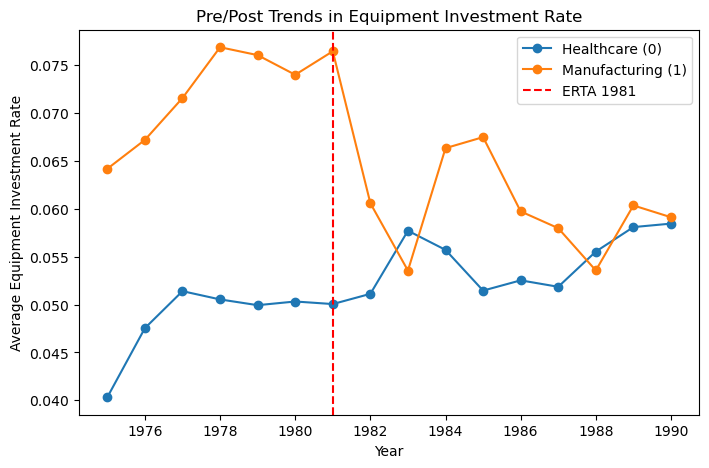

In [52]:
# Plot average investment rate by Year and Treatment group
panel_industry_investment_rates.groupby(['Year', 'treated'])['investment_equipment_rate'].mean().unstack().plot(
    figsize=(8,5),
    marker='o'
)

# Add ERTA policy marker
plt.axvline(1981, color='red', linestyle='--', label='ERTA 1981')
plt.title("Pre/Post Trends in Equipment Investment Rate")
plt.ylabel("Average Equipment Investment Rate")
plt.legend(['Healthcare (0)', 'Manufacturing (1)', 'ERTA 1981'])
plt.show()

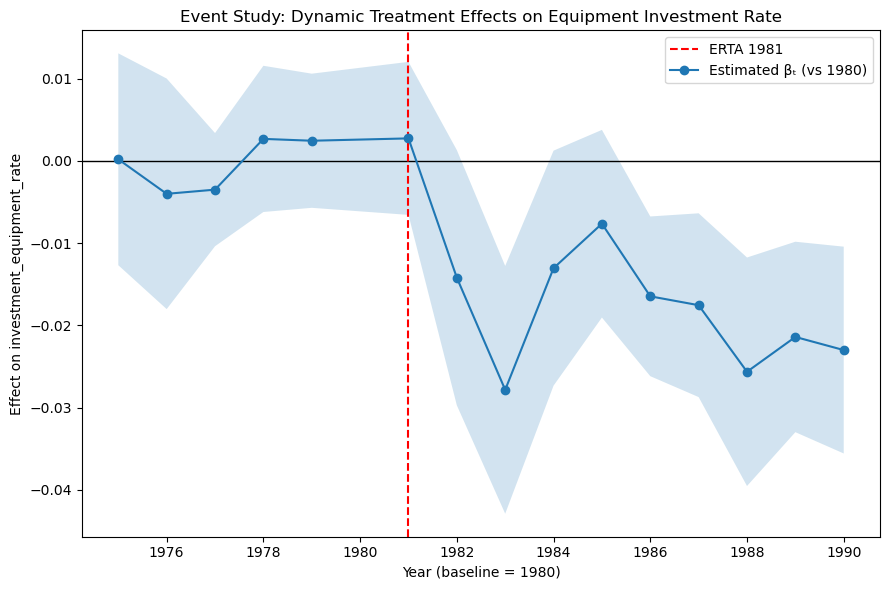

In [53]:
# Ensure types
panel_industry_investment_rates['Year'] = panel_industry_investment_rates['Year'].astype(int)

# 2) OLS with year-by-year interactions (event study)
# Use 1980 as the omitted (baseline) year so coefficients are relative to 1980
formula = "investment_equipment_rate ~ C(Year, Treatment(reference=1980))*treated + C(Industry)"

# Cluster by Industry if present; otherwise fall back to robust
if 'Industry' in panel_industry_investment_rates.columns:
    model = smf.ols(
        formula,
        data=panel_industry_investment_rates
    ).fit(cov_type="cluster", cov_kwds={"groups": panel_industry_investment_rates["Industry"]})
else:
    model = smf.ols(formula, data=panel_industry_investment_rates).fit(cov_type="HC1")

# 3) Pull interaction terms: C(Year,...)[T.YYYY]:treated
coef = model.params
se   = model.bse

pattern = re.compile(r"C\(Year.*\)\[T\.(\d+)\]:treated")  # captures the year
rows = []
for name, value in coef.items():
    m = pattern.search(name)
    if m:
        yr = int(m.group(1))
        rows.append((yr, value, se[name]))

results_df = pd.DataFrame(rows, columns=["year", "coef", "se"]).sort_values("year")
results_df["ci_lower"] = results_df["coef"] - 1.96 * results_df["se"]
results_df["ci_upper"] = results_df["coef"] + 1.96 * results_df["se"]

# 4) Plot
plt.figure(figsize=(9,6))
plt.axhline(0, color='black', linewidth=1)
plt.axvline(1981, color='red', linestyle='--', label='ERTA 1981')  # policy date
plt.plot(results_df["year"], results_df["coef"], marker='o', label='Estimated βₜ (vs 1980)')
plt.fill_between(results_df["year"], results_df["ci_lower"], results_df["ci_upper"], alpha=0.2)
plt.title("Event Study: Dynamic Treatment Effects on Equipment Investment Rate")
plt.xlabel("Year (baseline = 1980)")
plt.ylabel("Effect on investment_equipment_rate")
plt.legend()
plt.tight_layout()
plt.show()
